## Exploratory Data Analysis (EDA) of Stock Data 

This part serves as tha analytical layer of our trading pipeline. After succesfully extracted all the historical data via IBKR API.


We import the standard data science stack alongside Ta-Lib, a specialized library for financial technical analysis 


We load the `AAPL_10years_TRADES.csv` dataset, which contains approximately**195,372** rows of market activity. A critical preprocessing step here is converting the date strings into datetime objects and stripping timezone data to ensure seamless plotting and indexing.

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime 
import talib as ta


In [90]:
aapl_stk_trades = pd.read_csv("AAPL_10years_TRADES.csv")
aapl_stk_trades['date'] = pd.to_datetime(aapl_stk_trades['date'], format = '%Y%m%d %H:%M:%S %Z')
aapl_stk_trades['date'] =aapl_stk_trades['date'].dt.tz_localize(None)

In [91]:
aapl_stk_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195372 entries, 0 to 195371
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    195372 non-null  datetime64[ns]
 1   open    195372 non-null  float64       
 2   high    195372 non-null  float64       
 3   low     195372 non-null  float64       
 4   close   195372 non-null  float64       
 5   volume  195372 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 8.9 MB


In [92]:
stats_df = aapl_stk_trades.describe()

# Create a DataFrame with the count of null values for each column
null_count_df = aapl_stk_trades.isnull().sum().rename('isnull').to_frame().T

# Concatenate the two DataFrames vertically
summary_df = pd.concat([stats_df, null_count_df])

# Save the summary to an Excel file
summary_df.to_excel('description.xlsx')

In [93]:
import sweetviz as sv
report = sv.analyze(aapl_stk_trades)
report.show_html('report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Visualzing Long-Term Price Action 


This is our first real look at the asse's behavior over a decade-long horizon. 


The historical chart exhibits a distinct 'hockey stick' growth pattern. While price action prior to 2020 appears relatively stable and horizontal within this 10-year window, the period following the 2020 market pivot is characterized by accelerated, exponential appreciation.



### **Hypotheses: Why did the price surge after 2020?**

Based on market analysis and financial data, several key factors contributed to this "exponential" leg of the curve:

1. **The "Stay-at-Home" Digital Transformation**:
The COVID-19 pandemic acted as a catalyst. As the world shifted to remote work and online education, demand for iPads and Macs surged. Furthermore, App Store ecosystem billings grew from **$519B in 2019 to $1.1T in 2022**, as digital services became essential to daily life.
2. **The Services Pivot**:
Investors revalued Apple not just as a hardware manufacturer, but as a high-margin **Services company**. Growth in Apple Music, iCloud, and the App Store provided predictable, recurring revenue, which historically leads to higher valuation multiples.
3. **August 2020 Stock Split**:
Apple executed a **4-for-1 stock split** in August 2020. While a split doesn't change the company's intrinsic value, it made the shares significantly more accessible to retail investors, sparking a wave of new buying pressure that helped drive the price higher.
4. **The 5G iPhone Super-Cycle**:
The release of the iPhone 12 in late 2020 introduced 5G connectivity. This triggered a massive upgrade cycle (the "super-cycle") as millions of users replaced older models to access the new network speeds.
5. **Aggressive Capital Return (Buybacks)**:
Apple has utilized its "fortress" balance sheet to conduct massive **stock buybacks** (over $100B in 2023 alone). By reducing the total number of shares in circulation, Apple artificially increases its Earnings Per Share (EPS), which naturally pushes the share price upward.
6. **Macroeconomic Factors**:
The initial post-2020 period saw record-low interest rates and significant fiscal stimulus. Large-cap tech stocks like AAPL were viewed as "safe havens" with strong cash flows, attracting a disproportionate amount of institutional and retail capital.

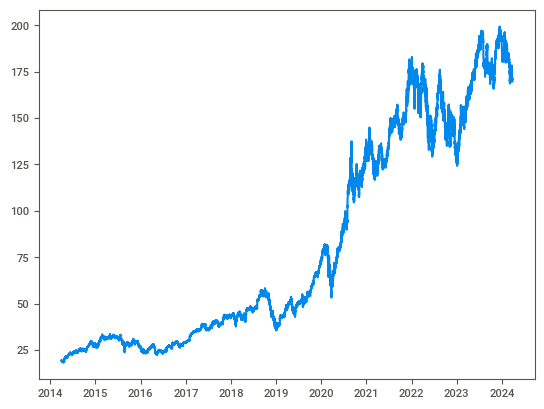

In [94]:
plt.plot(aapl_stk_trades['date'], aapl_stk_trades['open'])

In [95]:
aapl_stk_trades.describe()

,date,open,high,low,close,volume
count,195372,195372.000000,195372.000000,195372.000000,195372.000000,1.953720e+05
mean,2019-03-27 13:57:52.056385024,81.756565,81.840950,81.670388,81.757021,2.799993e+05
min,2014-03-31 09:30:00,18.280000,18.300000,18.260000,18.270000,0.000000e+00
25%,2016-09-26 12:43:45,31.430000,31.450000,31.400000,31.430000,8.637275e+04
50%,2019-03-28 12:27:30,50.930000,50.970000,50.880000,50.930000,1.517165e+05
75%,2021-09-23 15:41:15,141.090000,141.300000,140.862500,141.092500,2.813650e+05
max,2024-03-25 15:55:00,199.380000,199.620000,199.180000,199.370000,5.280800e+07
std,NaN,57.581463,57.642599,57.520068,57.581918,6.253944e+05


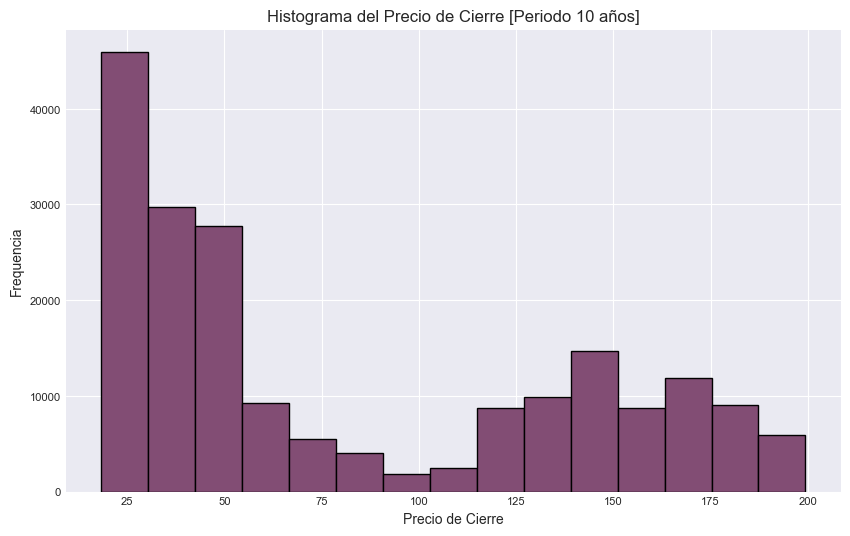

In [121]:
df = aapl_stk_trades.copy()

plt.figure(figsize=(10, 6))
plt.hist(df['close'], bins=15, color = '#824D74', edgecolor = 'black' )  # Creating histogram with 25 bins
plt.xlabel('Precio de Cierre')
plt.ylabel('Frequencia')
plt.title('Histograma del Precio de Cierre [Periodo 10 años]')

plt.show()

In [122]:
aapl_stk_trades['date']

0        2014-03-31 09:30:00
1        2014-03-31 09:35:00
2        2014-03-31 09:40:00
3        2014-03-31 09:45:00
4        2014-03-31 09:50:00
                 ...        
195367   2024-03-25 15:35:00
195368   2024-03-25 15:40:00
195369   2024-03-25 15:45:00
195370   2024-03-25 15:50:00
195371   2024-03-25 15:55:00
Name: date, Length: 195372, dtype: datetime64[ns]

### Historical Distribution Analysis: 5 Years 


The histogram organizes the clos prices into 15 bins. 


The highest bars (mode) represent the price ranges where Apple has traded most frequently. As the bars are on the right side of the chart, it confirms that the stock has spent more time at high valuations

The Right Skew is because the price has moved upward so rapidly that there is a long tail. 



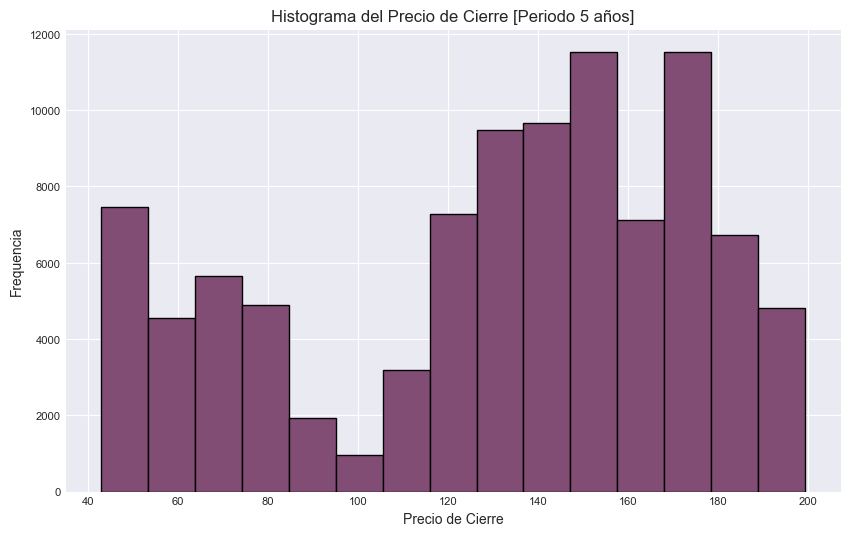

In [123]:
from datetime import datetime 

# Get the current date
current_date = datetime.now()

# Calculate the date 5 years ago
five_years_ago = current_date - pd.DateOffset(years=5)

# Filter the dataset to include only the last 5 years
df_last_5_years = df[df['date'] >= five_years_ago]

# Optionally, reset the index
df_last_5_years.reset_index(drop=True, inplace=True)

# Display the filtered dataset
plt.figure(figsize=(10, 6))
plt.hist(df_last_5_years['close'], color ='#824D74' , bins=15, edgecolor='black')  # Creating histogram with 25 bins
plt.xlabel('Precio de Cierre')
plt.ylabel('Frequencia')
plt.title('Histograma del Precio de Cierre [Periodo 5 años]')

plt.show()

### Boxplots for Volatility and Dispersion Analysis 

1. The 2019–2020 Transition: A Structural Shift A comparative analysis of the medians for 2019 and 2020 reveals a significant upward trajectory in valuation. The median price surged from approximately $50 USD to nearly $90 USD, marking a transformative period for the asset. This abrupt appreciation was accompanied by an unprecedented expansion in annual variance; the trading range for 2020 was particularly volatile, with prices fluctuating between a support level of $50 USD and a peak near $150 USD.

2. Longitudinal Volatility Trends (2014–2024) The boxplot distribution highlights a clear evolution in market regime. During the initial period (2014–2016), the interquartile ranges (represented by the height of the boxes) are relatively compressed, suggesting a period of stable, lower-volatility growth. In contrast, the data from 2021 to 2024 shows significantly "taller" boxes. This visual expansion confirms that as the asset's nominal price increased, its absolute volatility and price dispersion expanded proportionally, resulting in much wider intraday and intra-year price swings.

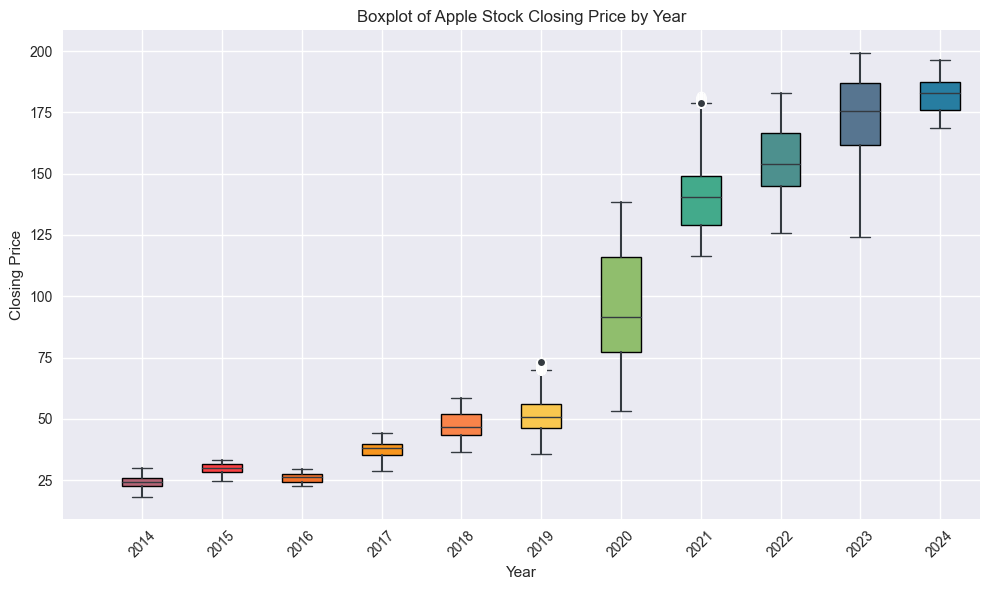

In [157]:
plt.style.use('seaborn-v0_8')

# Extract year from the date column
df['year'] = pd.to_datetime(df['date']).dt.year

# Group the data by year
grouped = df.groupby('year')

# Create a boxplot for each year
plt.figure(figsize=(10, 6))
bp = plt.boxplot([group['close'] for _, group in grouped], patch_artist=True)
plt.title('Boxplot of Apple Stock Closing Price by Year')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.xticks(range(len(grouped)), grouped.groups.keys())
plt.xticks(rotation=45)

# Change box colors
colors = ['#b56576', '#f94144', '#f3722c', '#f8961e', '#f9844a', '#f9c74f',
          '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#343a40',
                linewidth = 1.5,
                linestyle ="-")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#343a40',
            linewidth = 1)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='#343a40',
               linewidth = 1)
 
# changing style of fliers
for flierprops in bp['fliers']:
    flierprops.set(marker ='o',
              markerfacecolor = '#343a40',
              color ='#343a40')
    
plt.xticks(range(1, len(grouped) + 1), grouped.groups.keys(), rotation=45)
plt.tight_layout()
plt.show()

In [100]:
df = aapl_stk_trades.copy()

### Simple Moving Average and Exponential Moving Average


In financial analysis, SMA and EMA are the two most common types of Moving Averages. They are used to smoot out price noise to reveal the underlying trens of the stock. 

50-Period (Short-to-Intermediate Term): This reflects the "recent" sentiment. It filters out the daily noise but reacts quickly enough to catch a trend change within a few weeks or months.

100-Period (Intermediate-to-Long Term): This is a "slower" anchor. It represents the broader market cycle. Institutional investors often look at the 100 and 200-period averages to determine if a stock is in a "Bull" or "Bear" phase.


A. The Sentiment Gap (SMA vs. EMA)
If EMA_50 > SMA_50: It means the price has been rising more aggressively in the very recent past than the average of the last 50 days suggests. This is a sign of strengthening bullish momentum.

If EMA_50 < SMA_50: It suggests a recent slowdown or "cooling off," even if the longer-term trend is still up.

B. The Trend Crossover (50 vs. 100)
This is the most famous part of technical analysis:

Bullish Signal (Golden-ish Cross): When the SMA_50 (or EMA_50) crosses above the SMA_100. This indicates that short-term momentum is now stronger than long-term momentum, often leading to a sustained rally.

Bearish Signal (Death-ish Cross): When the 50-period line crosses below the 100-period line. This suggests the stock is losing steam and a downtrend may be starting.


This analysis adds a "Strategic Layer" for options trading:

If EMA_50 is above  SMA_100,  EDA suggests a "Bullish" environment. In this case, it might focus the Black-Scholes analysis on Call Options.

If the price of Apple (AAPL) is significantly higher than its SMA_100, it is "extended." It might expect the price to drop back toward the moving average (mean reversion). This might correlate with a spike in Put Option premiums as the market anticipates a pullback.

In [ ]:
df['SMA_100'] = ta.SMA(df['close'], 100)
df['SMA_50'] = ta.SMA(df['close'], 50)
df['EMA_100'] = ta.EMA(df['close'], 100)
df['EMA_50'] = ta.EMA(df['close'], 50)

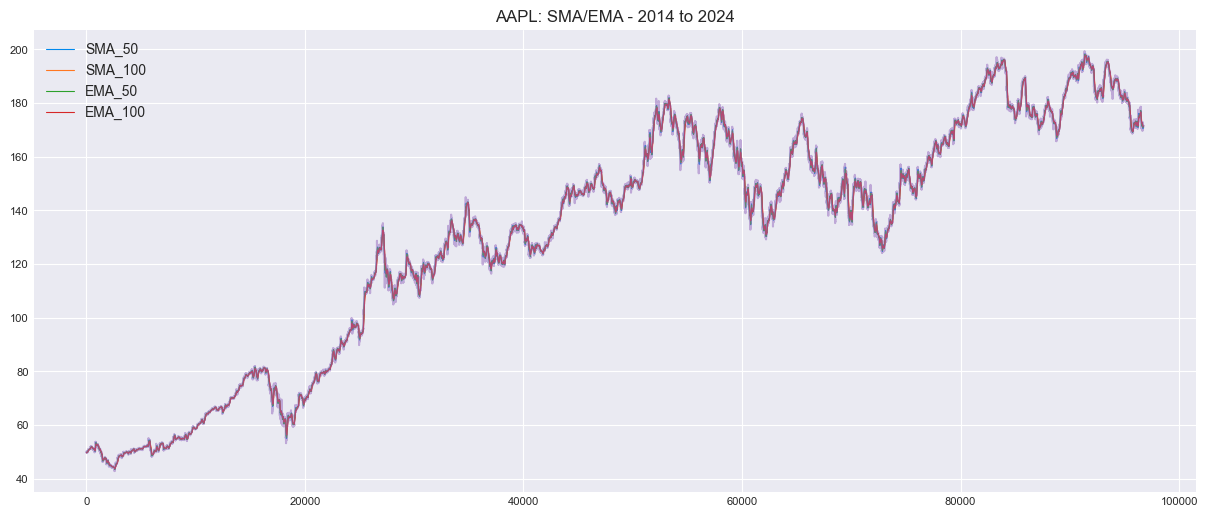

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_figheight(6)
fig.set_figwidth(15)

df_last_5_years = df[df['date'] >= five_years_ago]
# Optionally, reset the index
df_last_5_years.reset_index(drop=True, inplace=True)

df_last_5_years[['SMA_50','SMA_100','EMA_50','EMA_100']].plot(ax=axes, linewidth=0.8)
df_last_5_years['close'].plot(ax=axes, alpha=0.5) 
axes.set_title('AAPL: SMA/EMA - 2014 to 2024')
plt.show()

In [ ]:
df_last_5_years = df[df['date'] >= five_years_ago]

# Optionally, reset the index
df_last_5_years.reset_index(drop=True, inplace=True)

In [104]:
import plotly.graph_objects as go
import plotly.offline as py

# Assuming df is your DataFrame containing the required data

fig = go.Figure()

# Add SMA and EMA traces
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_50'], mode='lines', name='SMA_50'))
fig.add_trace(go.Scatter(x=df.index, y=df['SMA_100'], mode='lines', name='SMA_100'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_50'], mode='lines', name='EMA_50'))
fig.add_trace(go.Scatter(x=df.index, y=df['EMA_100'], mode='lines', name='EMA_100'))

# Add Close trace with more transparency
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='Close', opacity=0.5))

# Update layout
fig.update_layout(title='AAPL: SMA/EMA - 2014 to 2024', 
                  xaxis_title='Date', 
                  yaxis_title='Price')

# Enable zooming and panning
fig.update_layout(xaxis=dict(constrain='domain'), yaxis=dict(scaleanchor="x", scaleratio=1))

# Save the figure as an HTML file
py.plot(fig, filename='plot.html')

'plot.html'

(-0.01, 0.01)

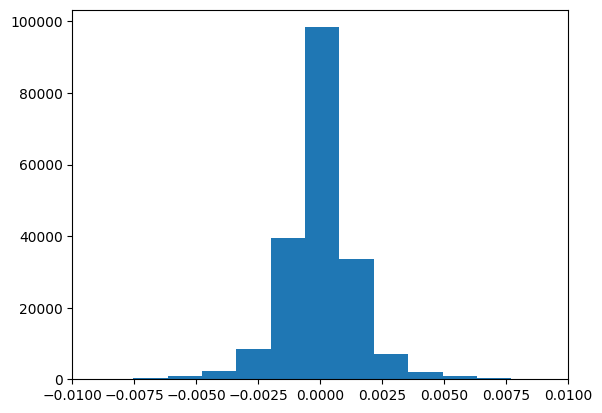

In [16]:
aapl_returns = aapl_stk_trades['close'].pct_change(1)
plt.hist(aapl_returns, bins = 150)
plt.xlim(-0.01, 0.01)

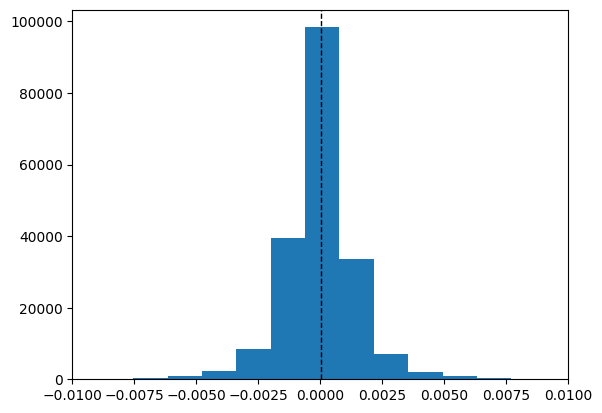

In [19]:
aapl_log_returns = np.log(aapl_stk_trades['close']/aapl_stk_trades['close'].shift(1))
plt.hist(aapl_returns, bins = 150)
plt.xlim(-0.01, 0.01)

plt.axvline(aapl_log_returns.mean(), color = 'k', linestyle = 'dashed', linewidth = 1, label = 'mean')

In [ ]:
aapl_copy = aapl_stk_trades.copy()
aapl_copy['returns'] = aapl_copy['close'].pct_change(1)


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 4.00

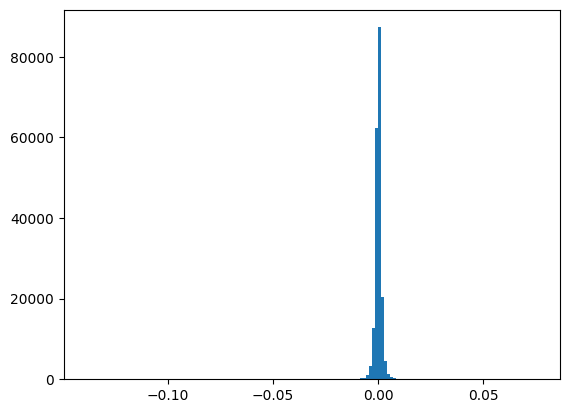

In [12]:
aapl_log_returns = np.log(aapl_stk_trades['close']/aapl_stk_trades['close'].shift(1))
plt.hist(aapl_log_returns, bins =150)

In [7]:


# Extract year, month, and day into separate columns 

aapl_stk_midpoint['year'] = aapl_stk_midpoint['date'].dt.year
aapl_stk_midpoint['month'] = aapl_stk_midpoint['date'].dt.month
aapl_stk_midpoint['day'] = aapl_stk_midpoint['date'].dt.day
aapl_stk_midpoint['hour_minute_second'] = aapl_stk_midpoint['date'].dt.strftime('%H:%M:%S')

aapl_stk_midpoint.drop('date', axis=1, inplace=True)
column_order = ['year', 'month', 'day', 'hour_minute_second', 'open', 'high', 'low', 'close']
aapl_stk_midpoint = aapl_stk_midpoint[column_order]

In [8]:
aapl_stk_midpoint.head()

,year,month,day,hour_minute_second,open,high,low,close
0,2014,3,25,09:30:00,19.34,19.37,19.30,19.31
1,2014,3,25,09:35:00,19.31,19.36,19.30,19.34
2,2014,3,25,09:40:00,19.34,19.36,19.32,19.32
3,2014,3,25,09:45:00,19.32,19.36,19.32,19.36
4,2014,3,25,09:50:00,19.36,19.37,19.35,19.36


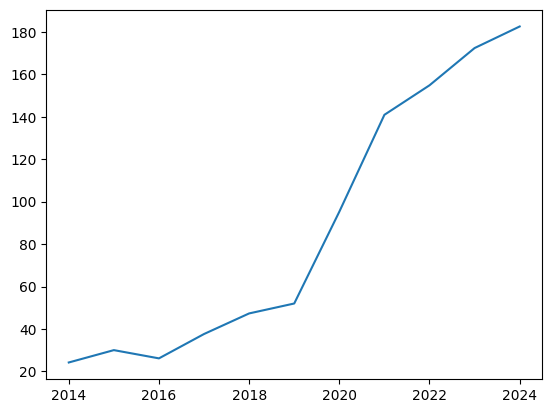

In [13]:
grouped = aapl_stk_midpoint.groupby('year')['open'].mean()
plt.plot(grouped.index, grouped.values )